In [136]:
import sys
sys.path.append("..")
import sklearn
from sklearn.datasets import make_circles

In [137]:
n_samples = 1000

X, y = make_circles(n_samples=n_samples, random_state=18, noise=0.05)
print(X[:5])
print(y[:5])

[[-0.95189112  0.02953932]
 [-0.81725471 -0.07599737]
 [ 0.53565101  0.78335749]
 [ 0.21526265 -1.08597367]
 [ 0.79715734 -0.3255041 ]]
[0 1 0 0 1]


In [138]:
import pandas as pd
circles = pd.DataFrame(X, columns=['x', 'y'])
circles['label'] = y
circles.head()

,x,y,label
0,-0.951891,0.029539,0
1,-0.817255,-0.075997,1
2,0.535651,0.783357,0
3,0.215263,-1.085974,0
4,0.797157,-0.325504,1


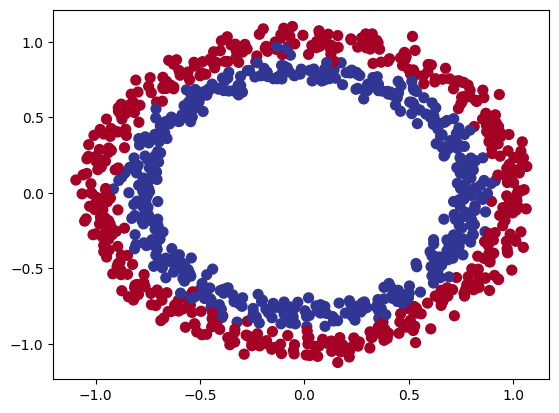

In [139]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.RdYlBu)
plt.show()

In [140]:
X.shape, y.shape

((1000, 2), (1000,))

In [141]:
import torch

X = torch.from_numpy(X).float()
y = torch.from_numpy(y).float()
print(X[:5])
print(y[:5])
print(X.shape, y.shape)

tensor([[-0.9519,  0.0295],
        [-0.8173, -0.0760],
        [ 0.5357,  0.7834],
        [ 0.2153, -1.0860],
        [ 0.7972, -0.3255]])
tensor([0., 1., 0., 0., 1.])
torch.Size([1000, 2]) torch.Size([1000])


In [142]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

torch.Size([800, 2]) torch.Size([800])
torch.Size([200, 2]) torch.Size([200])


In [143]:
import torch.nn as nn

class CircleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=8)
        self.layer_2 = nn.Linear(in_features=8, out_features=1)

    def forward(self, x):
        x = self.layer_1(x)
        x = self.layer_2(x)
        return x

model = CircleModel()
print(model)

CircleModel(
  (layer_1): Linear(in_features=2, out_features=8, bias=True)
  (layer_2): Linear(in_features=8, out_features=1, bias=True)
)


In [144]:
# This model can also be implemented using a Sequential model

model = nn.Sequential(
    nn.Linear(in_features=2, out_features=8),
    nn.Linear(in_features=8, out_features=1)
)
print(model)

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): Linear(in_features=8, out_features=1, bias=True)
)


In [145]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.6337,  0.1079],
                      [-0.3277,  0.4955],
                      [-0.0706, -0.3671],
                      [-0.5746, -0.5489],
                      [ 0.5188, -0.4066],
                      [-0.1793, -0.3820],
                      [-0.2553, -0.1467],
                      [ 0.2993,  0.0564]])),
             ('0.bias',
              tensor([ 0.3787, -0.6215,  0.2636, -0.6934,  0.0671,  0.2117,  0.2324, -0.5715])),
             ('1.weight',
              tensor([[ 0.3303,  0.1603,  0.1704,  0.2402, -0.1879, -0.1785,  0.1390, -0.1477]])),
             ('1.bias', tensor([0.0748]))])

In [146]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

In [147]:
# CALCULATING ACCURACY
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

In [ ]:
torch.manual_seed(18)

accuracy_list = []
loss_list = []

# TRAINING LOOP
epochs = 10000
for epoch in range(epochs):
    ### Training
    model.train()

    y_logits = model(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
  
    loss = loss_fn(y_logits, y_train) 
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred) 

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    ### Testing
    model.eval()
    with torch.inference_mode():
        test_logits = model(X_test).squeeze() 
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)
        accuracy_list.append(acc)
        loss_list.append(loss)

    if epoch % 500 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

In [162]:
X, y = make_circles(n_samples=n_samples, random_state=18, noise=0.05)

X = torch.from_numpy(X).float()
y = torch.from_numpy(y).float()
print(X[:5])
print(y[:5])
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

tensor([[-0.9519,  0.0295],
        [-0.8173, -0.0760],
        [ 0.5357,  0.7834],
        [ 0.2153, -1.0860],
        [ 0.7972, -0.3255]])
tensor([0., 1., 0., 0., 1.])
torch.Size([1000, 2]) torch.Size([1000])
torch.Size([800, 2]) torch.Size([800])
torch.Size([200, 2]) torch.Size([200])


In [163]:
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=8)
        self.layer_2 = nn.Linear(in_features=8, out_features=8)
        self.layer_3 = nn.Linear(in_features=8, out_features=1)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_2 = CircleModelV2()
model_2

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=8, bias=True)
  (layer_2): Linear(in_features=8, out_features=8, bias=True)
  (layer_3): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
)

In [164]:
# Setup loss and optimizer 
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.01)

In [173]:
torch.manual_seed(18)

accuracy_list = []
loss_list = []

# TRAINING LOOP
epochs = 10000
for epoch in range(epochs):
    ### Training
    model_2.train()

    y_logits = model_2(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
  
    loss = loss_fn(y_logits, y_train) 
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred) 

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    ### Testing
    model_2.eval()
    with torch.inference_mode():
        test_logits = model_2(X_test).squeeze() 
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)
        accuracy_list.append(acc)
        loss_list.append(loss)

    if epoch % 500 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.25657, Accuracy: 95.38% | Test loss: 0.27080, Test acc: 94.00%
Epoch: 500 | Loss: 0.23139, Accuracy: 95.75% | Test loss: 0.24915, Test acc: 94.00%
Epoch: 1000 | Loss: 0.21150, Accuracy: 95.88% | Test loss: 0.23192, Test acc: 94.00%
Epoch: 1500 | Loss: 0.19542, Accuracy: 95.88% | Test loss: 0.21765, Test acc: 93.50%
Epoch: 2000 | Loss: 0.18218, Accuracy: 95.88% | Test loss: 0.20589, Test acc: 93.00%
Epoch: 2500 | Loss: 0.17132, Accuracy: 96.00% | Test loss: 0.19616, Test acc: 93.50%
Epoch: 3000 | Loss: 0.16231, Accuracy: 96.00% | Test loss: 0.18833, Test acc: 93.50%
Epoch: 3500 | Loss: 0.15470, Accuracy: 96.12% | Test loss: 0.18176, Test acc: 93.50%
Epoch: 4000 | Loss: 0.14823, Accuracy: 96.25% | Test loss: 0.17637, Test acc: 93.50%
Epoch: 4500 | Loss: 0.14269, Accuracy: 96.25% | Test loss: 0.17154, Test acc: 93.50%
Epoch: 5000 | Loss: 0.13789, Accuracy: 96.25% | Test loss: 0.16748, Test acc: 93.50%
Epoch: 5500 | Loss: 0.13370, Accuracy: 96.12% | Test loss: 0.16393, T

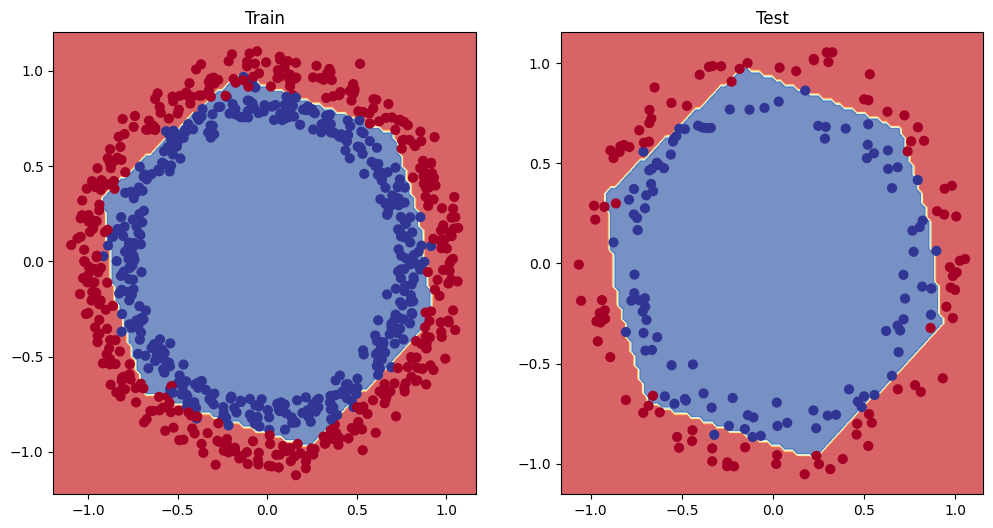

In [174]:
from helper_functions import plot_decision_boundary

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_2, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_2, X_test, y_test)

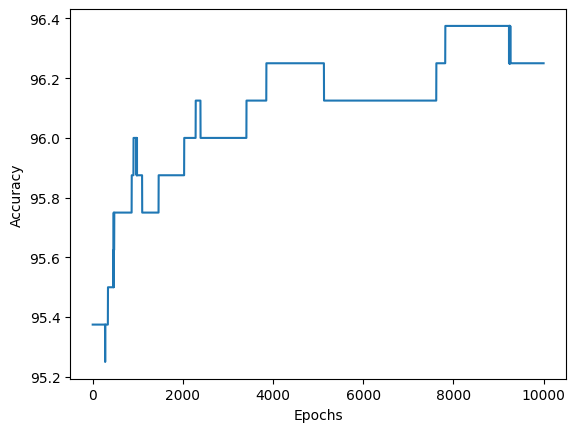

In [175]:
# PLOT ACCURACY WRT EPOCH

plt.plot(accuracy_list)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()